
# Project: Investigate a Dataset (TMDB Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### Questions

<p>1-Which year has the highest release of movies?</p>
<p>2-Which Month Released Highest Number Of Movies In All Of The Years?</p>
<p>3-Top Movies based on features</p>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv("tmdb-movies.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
#print the shape of the data rows and columns
df.shape

(10866, 21)

In [4]:
#print 5 rows from the data
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning (Replace this with more specific notes!)

In [5]:
#remove unwanted columns
labels = ['homepage', 'tagline', 'overview', 'keywords', 'production_companies']
df = df.drop(columns = labels)

In [6]:
# Fixing 'release_date dtype()'
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   imdb_id         10856 non-null  object        
 2   popularity      10866 non-null  float64       
 3   budget          10866 non-null  int64         
 4   revenue         10866 non-null  int64         
 5   original_title  10866 non-null  object        
 6   cast            10790 non-null  object        
 7   director        10822 non-null  object        
 8   runtime         10866 non-null  int64         
 9   genres          10843 non-null  object        
 10  release_date    10866 non-null  datetime64[ns]
 11  vote_count      10866 non-null  int64         
 12  vote_average    10866 non-null  float64       
 13  release_year    10866 non-null  int64         
 14  budget_adj      10866 non-null  float64       
 15  re

In [7]:
#Finding missing values
df.isna().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [8]:
#Removing missing values from 'cast' and 'genres'
df = df[df["cast"].isnull() != True]
df = df[df["genres"].isnull() != True]
df = df[df["imdb_id"].isnull() != True]
df = df[df["director"].isnull() != True]


df.isna().sum()

In [9]:
#finding duplicated values
df.duplicated().sum()

1

In [10]:
#removing duplicated values
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [11]:
#print the shape after doing the cleaning process
df.shape

(10726, 16)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Which year has the highest release of movies?)

In [12]:
movies_per_year = df.groupby('release_year').count()['id']
print(movies_per_year)

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    430
2008    486
2009    523
2010    475
2011    532
2012    574
2013    648
2014    682
2015    617
Name: id, dtype: int64


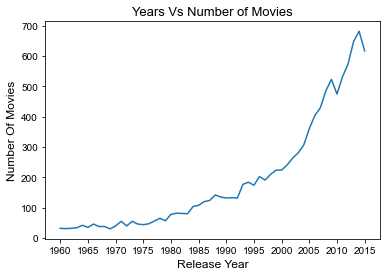

In [13]:
movies_per_year.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Years Vs Number of Movies", fontsize= 13)
plt.xlabel("Release Year", fontsize = 12)
plt.ylabel("Number Of Movies", fontsize = 12)
sns.set_style('whitegrid')

<strong>After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).</strong>

## Research Question 2 (Which Month Released Highest Number Of Movies In All Of The Years?)


In [14]:
released_movies = df['release_date'].dt.month.value_counts().sort_index()
print(released_movies)

1      888
2      681
3      813
4      791
5      807
6      822
7      790
8      906
9     1319
10    1137
11     798
12     974
Name: release_date, dtype: int64


Text(0, 0.5, 'Number of movie releases')

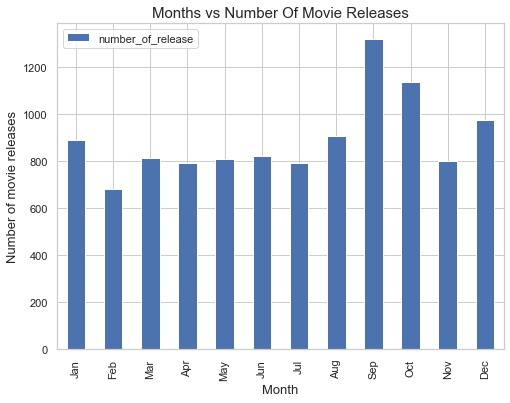

In [15]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
released_movies = pd.DataFrame(released_movies)
released_movies['month'] = months
#change the column name of the new dataframe 'number_of_release'
released_movies.rename(columns = {'release_date':'number_of_release'},inplace=True)

released_movies.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

<strong>According to the plot we can conclude that there are higher number of release in september and october month.</strong>



### Research Question 3 (Top Movies based on features)

#### Question #3.1: Top Movies based on their revenue


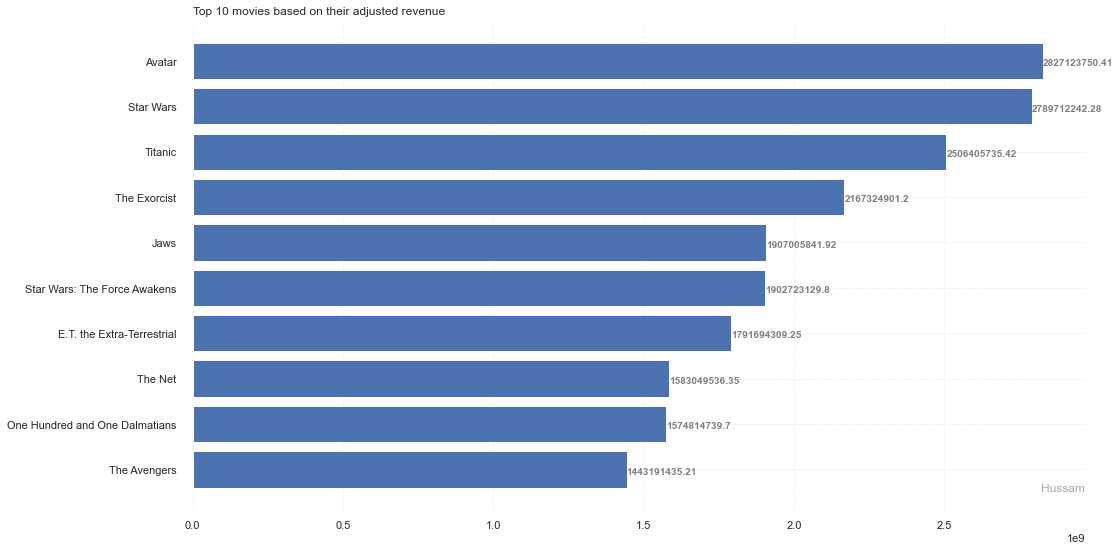

In [16]:
#Fetching different columns with 2 different ways of code
movies_and_revenue = df[["original_title", "revenue_adj"]]
movies_and_budget = df[['original_title','budget_adj']]
movies_and_popularity = df[['original_title','popularity']]
movies_and_votes= df[['original_title','vote_average']]



# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title,
            movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)

def drawFig(title):
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)


    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    ax.set_title(title,
                 loc ='left', )

    # Add Text watermark
    fig.text(0.9, 0.15, 'Hussam', fontsize = 12,
             color ='grey', ha ='right', va ='bottom',
             alpha = 0.7)

    # Show Plot
    plt.show()
    
drawFig("Top 10 movies based on their adjusted revenue")

<strong>According to the table above, the top 5 movies from the given dataset based on their adjusted revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.</strong>

#### Question #3.2: Top Movies based on their  budget


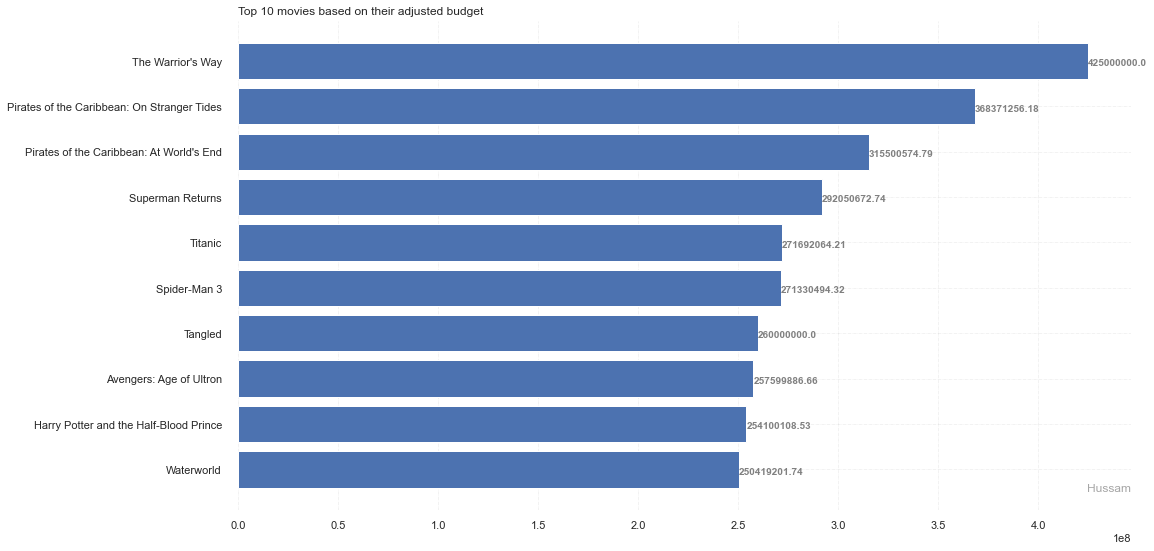

In [17]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(movies_and_budget.sort_values(by = "budget_adj", ascending=False).head(10).original_title,
        movies_and_budget.sort_values(by = "budget_adj", ascending=False).head(10).budget_adj)

drawFig("Top 10 movies based on their adjusted budget")



<strong>According to the table above, the top 5 movies from the given dataset based on their adjusted budget are the followings; The Warrioi's Way, Pirates of the Caribbean. On Stranger Tides, Pirates of the Caribbean. At World's End, Superman Returns and Titanic.</strong>

#### Question #3.3: Top Movies based on their popularity


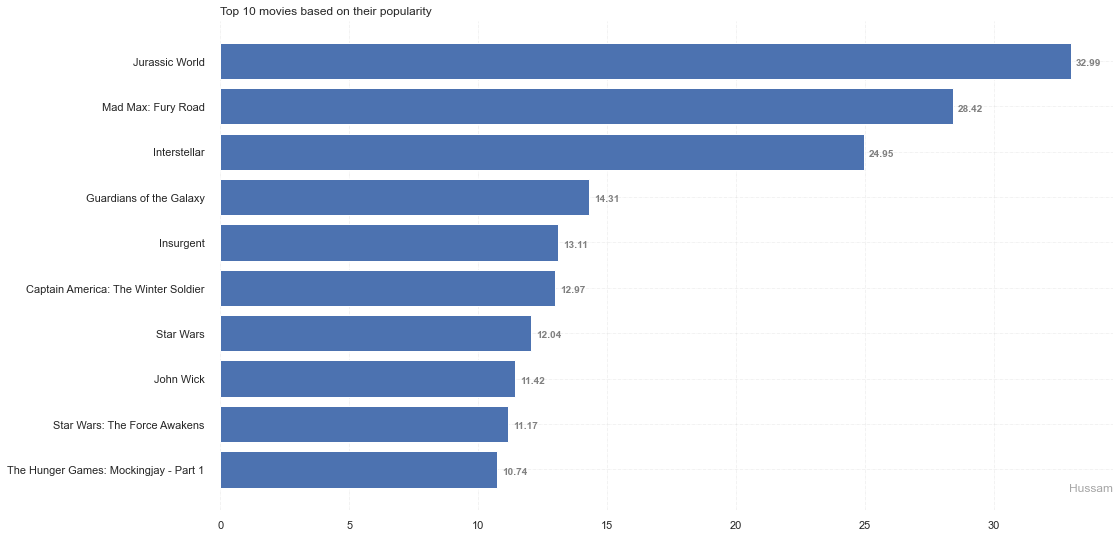

In [18]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(movies_and_popularity.sort_values(by = "popularity", ascending=False).head(10).original_title,
        movies_and_popularity.sort_values(by = "popularity", ascending=False).head(10).popularity)

drawFig("Top 10 movies based on their popularity")


<strong>According to the table above, the top 5 movies from the given dataset based on their Popularity are the followings; Jurassic World, Mad Max: Fury Road, Interstellar, Gaurdians of the Galaxy and Insurgent.</strong>

#### Question #3.4: Top Movies based on their average vote


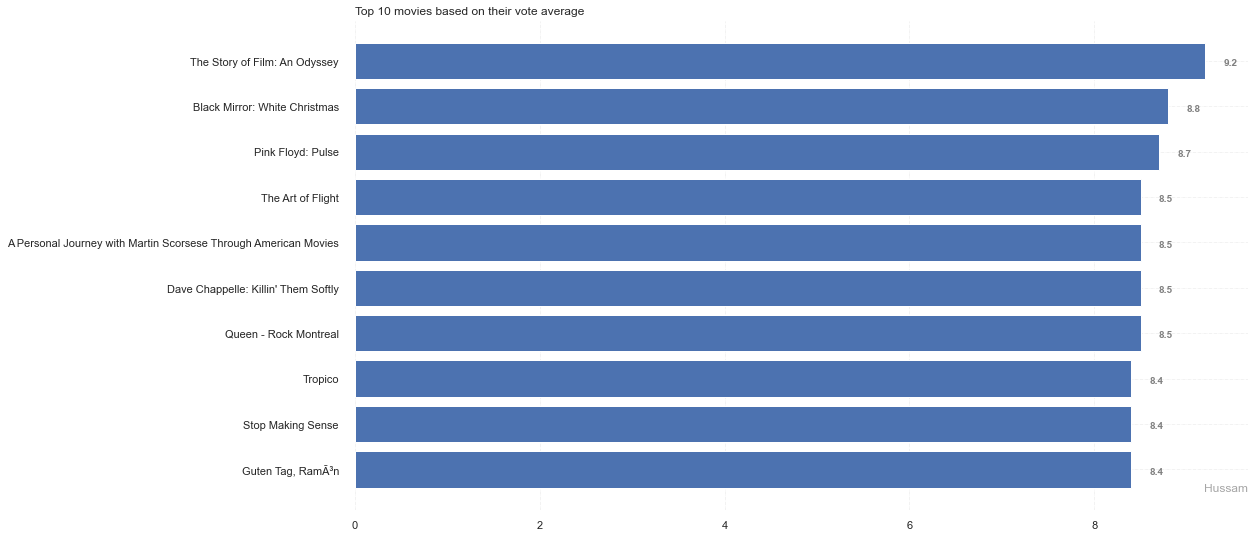

In [19]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(movies_and_votes.sort_values(by = "vote_average", ascending=False).head(10).original_title,
        movies_and_votes.sort_values(by = "vote_average", ascending=False).head(10).vote_average)

drawFig("Top 10 movies based on their vote average")


<strong>According to the table above, the top 5 movies from the given dataset based on their Voting Average are the followings; The Story of Film: An Odyssey, Black Mirror: White Christmas, Pink Floyd: Pulse, The Art of Flight and A Personal journey with Martin scoursese Through American Movies.</strong>

<a id='conclusions'></a>
## Conclusions



<p>1- Year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).</p>
<p>2- The higher number of release in september and october month.</p>
<p>3- The top 5 movies from the given dataset based on their adjusted revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.</p>
<p>4- The top 5 movies from the given dataset based on their adjusted budget are the followings; The Warrioi's Way, Pirates of the Caribbean. On Stranger Tides, Pirates of the Caribbean. At World's End, Superman Returns and Titanic.</p>
<p>5- The top 5 movies from the given dataset based on their Popularity are the followings; Jurassic World, Mad Max: Fury Road, Interstellar, Gaurdians of the Galaxy and Insurgent.</p>
<p>6- The top 5 movies from the given dataset based on their Voting Average are the followings; The Story of Film: An Odyssey, Black Mirror: White Christmas, Pink Floyd: Pulse, The Art of Flight and A Personal journey with Martin scoursese Through American Movies.</p>

<strong>The limitations associated with the conclusions are:</strong><br>

There is a big limitation here, as can be seen from data processed above, around 52 % of budget data is zero !! which affects profit calculation greatly. Combined with zero revenue, around 65 % of profit is zero or wrongly calculated !!